In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [39]:
data_c = pd.read_csv('data.csv')

In [40]:
data_c.head(n=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [41]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              230 non-null    int64 
 1   Gender                  230 non-null    object
 2   Age                     230 non-null    int64 
 3   Annual Income (k$)      230 non-null    int64 
 4   Spending Score (1-100)  230 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.1+ KB


In [42]:
data_c.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
225,False,False,False,False,False
226,False,False,False,False,False
227,False,False,False,False,False
228,False,False,False,False,False


In [43]:
data_c.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
val = data_c.iloc[:,[3,4]].values

In [45]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42, n_init=1)
    kmeans.fit(val)
    wcss.append(kmeans.inertia_)


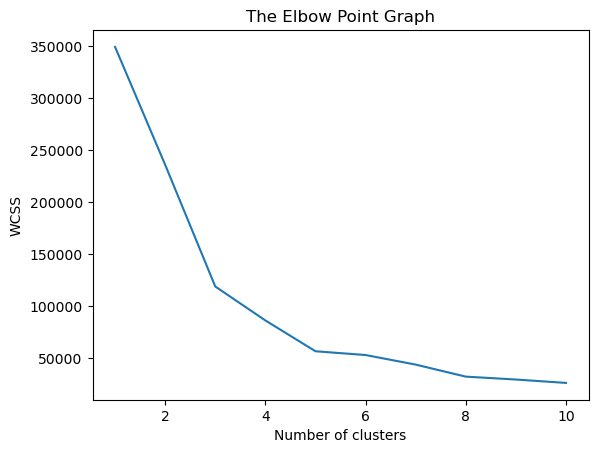

In [46]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=1)
Y = kmeans.fit_predict(val)

print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 1 4 0 4 0 4 1 4 0 4 0 4 0 4 0 4 1 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0]


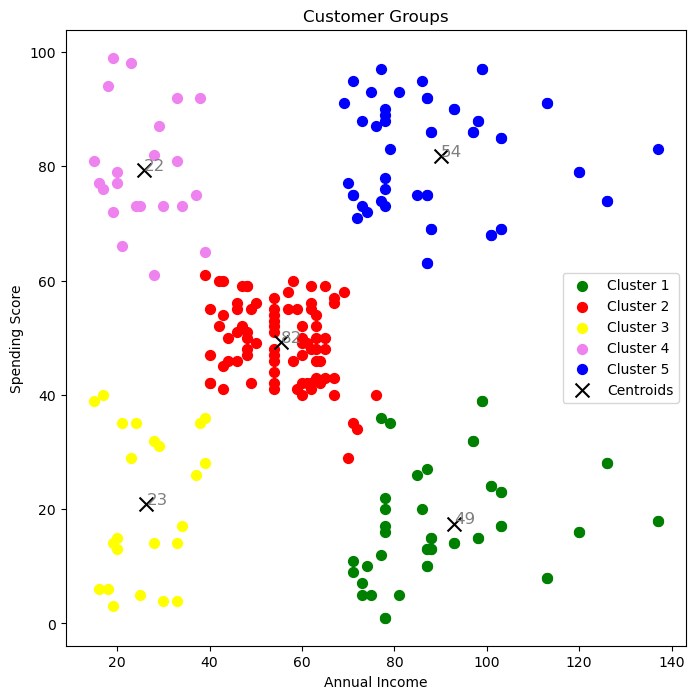

In [51]:
plt.figure(figsize=(8,8))
plt.scatter(val[Y==0, 0], val[Y==0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(val[Y==1, 0], val[Y==1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(val[Y==2, 0], val[Y==2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(val[Y==3, 0], val[Y==3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(val[Y==4, 0], val[Y==4, 1], s=50, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', marker='x', label='Centroids')

cluster_labels, cluster_counts = np.unique(Y, return_counts=True)
for label, count in zip(cluster_labels, cluster_counts):
    plt.text(kmeans.cluster_centers_[label, 0], kmeans.cluster_centers_[label, 1], str(count), fontsize=12, color='grey')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
